# Predict Diabetes

Dataset ini berasal dari National Institute of Diabetes and Digestive and Kidney Diseases dan digunakan untuk memprediksi apakah seorang pasien menderita diabetes. Dataset ini terdiri dari data pasien perempuan keturunan Indian Pima yang berusia minimal 21 tahun. Dataset mencakup beberapa variabel medis sebagai fitur prediktor (independen), dan satu variabel target (dependen), yaitu Outcome yang menunjukkan apakah pasien menderita diabetes atau tidak.



Link dataset  : https://www.kaggle.com/datasets/whenamancodes/predict-diabities

In [564]:
# Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [565]:
# Load dataset dan menampilkan 5 data teratas
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [566]:
# Menampilkan informasi tentang dataset (df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Preprocessing

Dilakukan untuk menyiapkan data agar lebih bersih, relevan, dan sesuai format yang dibutuhkan, sehingga hasil analisis atau prediksi menjadi lebih akurat dan efisien.

In [567]:
# Cek nilai yang hilang (null)
print("Jumlah nilai null:")
print(df.isnull().sum())

Jumlah nilai null:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [568]:
#Cek nilai yang duplikat
jumlah_duplikat = df.duplicated().sum()
print("Jumlah baris duplikat:", jumlah_duplikat)


Jumlah baris duplikat: 0


In [569]:
# Cek nilai yang sama dengan 0 sebelum
print("Cek nilai sama dengan 0 sebelum:")
print((df == 0).sum())

Cek nilai sama dengan 0 sebelum:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [570]:
# Mengganti nilai 0 pada kolom dengan nilai median dari masing-masing kolom, karena 0 pada kolom tersebut dianggap sebagai nilai tidak valid secara medis
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[col] = df[col].replace(0, df[col].median())

In [571]:
# Cek nilai yang sama dengan 0 sesudah
print("Cek nilai sama dengan 0 sesudah:")
print((df == 0).sum())

Cek nilai sama dengan 0 sesudah:
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [572]:
# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Visualisasi Korelasi
Menampilkan heatmap untuk melihat hubungan antar fitur dengan target.

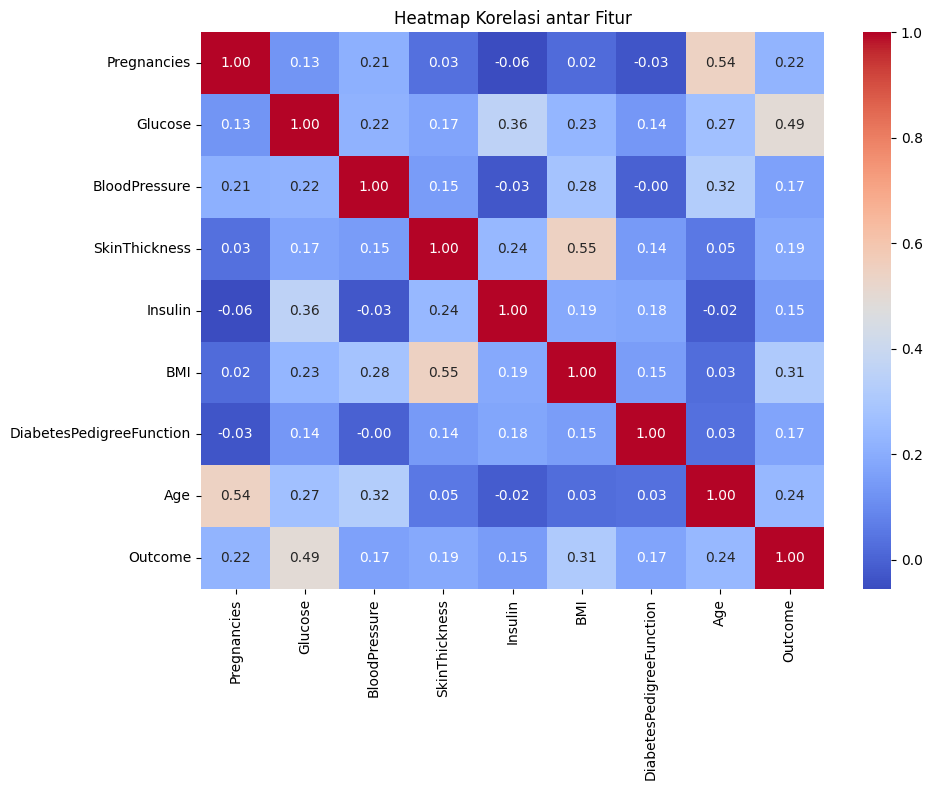

In [573]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur")
plt.tight_layout()
plt.show()

## Pelatihan Model SVM

In [574]:
# Memisahkan fitur (X) dan target (y).
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [575]:
# Membagi data menjadi data latih dan data uji (90% - 10%).
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=75)

In [576]:
# Buat dan latih model SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [577]:
# Prediksi dan evaluasi model
y_pred = model.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0]


In [578]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8181818181818182


In [579]:
# Menampilkan laporan
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.98      0.86        43
           1       0.95      0.62      0.75        34

    accuracy                           0.82        77
   macro avg       0.86      0.80      0.80        77
weighted avg       0.85      0.82      0.81        77



## Prediksi Data

In [580]:
data_baru = [[2, 120, 70, 20, 79, 25.0, 0.5, 33]]
data_baru_scaled = scaler.transform(data_baru)
prediksi = model.predict(data_baru_scaled)

if prediksi[0] == 1:
    print("Prediksi: Terkena diabetes 😟")
else:
    print("Prediksi: Tidak terkena diabetes 🙂")


Prediksi: Tidak terkena diabetes 🙂


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [581]:
# Menyimpan model SVM
joblib.dump(model, "svm_model_diabetes.pkl")
print("Model SVM berhasil disimpan!")

Model SVM berhasil disimpan!
